# Sterner & Elser: Homeostasis Model

Ecological stoichiometry assumes that while food quality ($x$) varies wildly, the consumer's internal composition ($y$) remains relatively stable. The strength of this regulation is quantified by the **Homeostatic Regulation Coefficient ($H$)**.

### 1. The Power Law Model
The relationship between Resource Stoichiometry ($x$, e.g., Food P:C) and Consumer Stoichiometry ($y$, e.g., Grazer P:C) is modeled as:

$$y = c x^{1/H}$$

Where:
* **$H$** is the Homeostatic Regulation Coefficient ($H \ge 1$).
* **$c$** is a constant.

### 2. The Linearized Form
Taking the logarithm of both sides gives a linear equation:

$$\log(y) = \log(c) + \frac{1}{H} \log(x)$$

The slope of the log-log plot represents the inverse of homeostasis ($1/H$).

### 3. Interpreting $H$
* **$H \to \infty$ (Slope $\approx$ 0):** **Strict Homeostasis.** The organism's composition never changes, regardless of what it eats (e.g., Vertebrates).
* **$H = 1$ (Slope = 1):** **No Homeostasis (Osmoconformity).** The organism is identical to its food (e.g., some Fungi/Bacteria).
* **$1 < H < \infty$:** **Weak Homeostasis.** The organism changes slightly as diet changes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def homeostasis_model(x, c, H):
    """
    y = c * x^(1/H)
    """
    # Prevent division by zero if H is infinite
    if np.isinf(H):
        exponent = 0
    else:
        exponent = 1.0 / H
        
    return c * (x ** exponent)

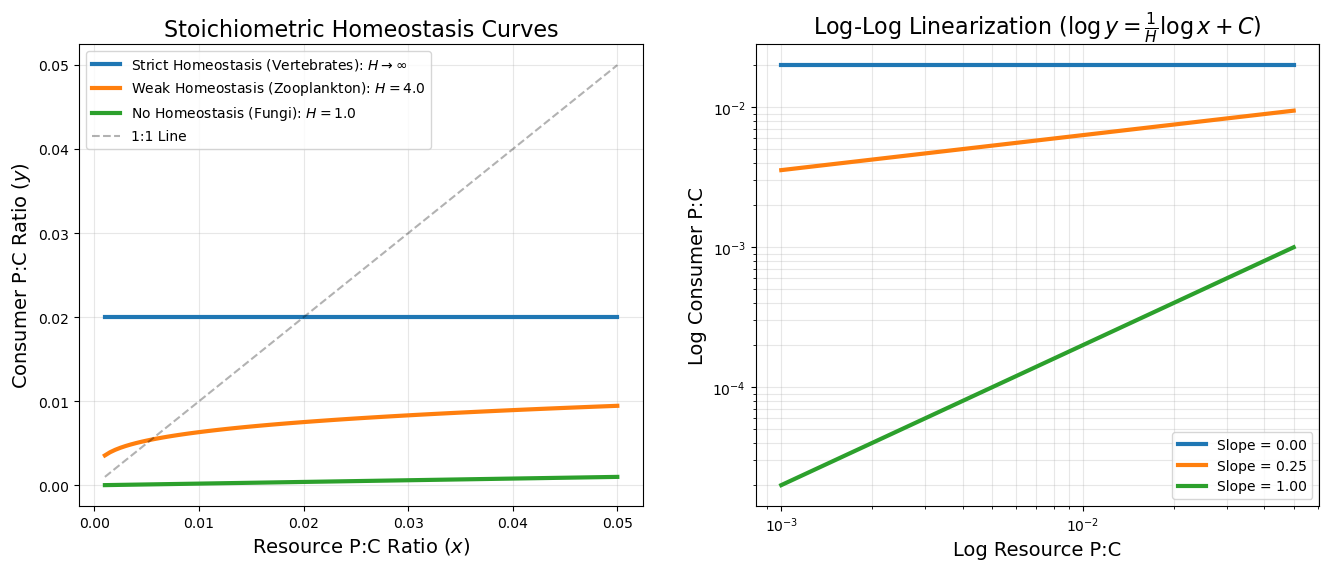

In [4]:
x_food = np.linspace(0.001, 0.05, 100) 
c_val = 0.02

scenarios = {
    'Strict Homeostasis (Vertebrates)': float('inf'),
    'Weak Homeostasis (Zooplankton)': 4.0,
    'No Homeostasis (Fungi)': 1.0
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for name, H in scenarios.items():
    y_consumer = homeostasis_model(x_food, c_val, H)
    
    if np.isinf(H):
        lbl = f'{name}: $H \\to \\infty$'
    else:
        lbl = f'{name}: $H={H}$'
        
    ax1.plot(x_food, y_consumer, linewidth=3, label=lbl)


ax1.plot(x_food, x_food, 'k--', alpha=0.3, label='1:1 Line')

ax1.set_title('Stoichiometric Homeostasis Curves', fontsize=16)
ax1.set_xlabel('Resource P:C Ratio ($x$)', fontsize=14)
ax1.set_ylabel('Consumer P:C Ratio ($y$)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

for name, H in scenarios.items():
    y_consumer = homeostasis_model(x_food, c_val, H)
    ax2.loglog(x_food, y_consumer, linewidth=3, label=f'Slope = {1/H if not np.isinf(H) else 0:.2f}')

ax2.set_title('Log-Log Linearization ($\log y = \\frac{1}{H} \log x + C$)', fontsize=16)
ax2.set_xlabel('Log Resource P:C', fontsize=14)
ax2.set_ylabel('Log Consumer P:C', fontsize=14)
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.3)

plt.show()

In [5]:
from scipy.stats import linregress

def calculate_homeostasis_coefficient(resource_data, consumer_data):
    """
    Calculates H given arrays of Resource (x) and Consumer (y) stoichiometry.
    """
    
    # 1. Log transform the data
    log_x = np.log(resource_data)
    log_y = np.log(consumer_data)
    
    # 2. Linear Regression to find slope (1/H)
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    
    # 3. Invert slope to get H
    if slope == 0:
        H = float('inf')
    else:
        H = 1.0 / slope
        
    print(f"{'-'*40}")
    print(f"Homeostasis Calculation Results")
    print(f"{'-'*40}")
    print(f"Slope (1/H):   {slope:.4f}")
    print(f"R-squared:     {r_value**2:.4f}")
    print(f"H Coefficient: {H:.4f}")
    
    if H > 10:
        print(">> Conclusion: Strict Homeostasis")
    elif H > 1.5:
        print(">> Conclusion: Weak/Plastic Homeostasis")
    else:
        print(">> Conclusion: Non-Homeostatic (Conformer)")
    print("\n")

In [6]:
np.random.seed(42)

true_H = 4.0

x_data = np.linspace(0.005, 0.05, 20)
noise = np.random.normal(0, 0.1, 20)
y_data = 0.02 * (x_data**(1/true_H)) * np.exp(noise)

calculate_homeostasis_coefficient(x_data, y_data)

----------------------------------------
Homeostasis Calculation Results
----------------------------------------
Slope (1/H):   0.1697
R-squared:     0.6578
H Coefficient: 5.8932
>> Conclusion: Weak/Plastic Homeostasis




### Vector Field

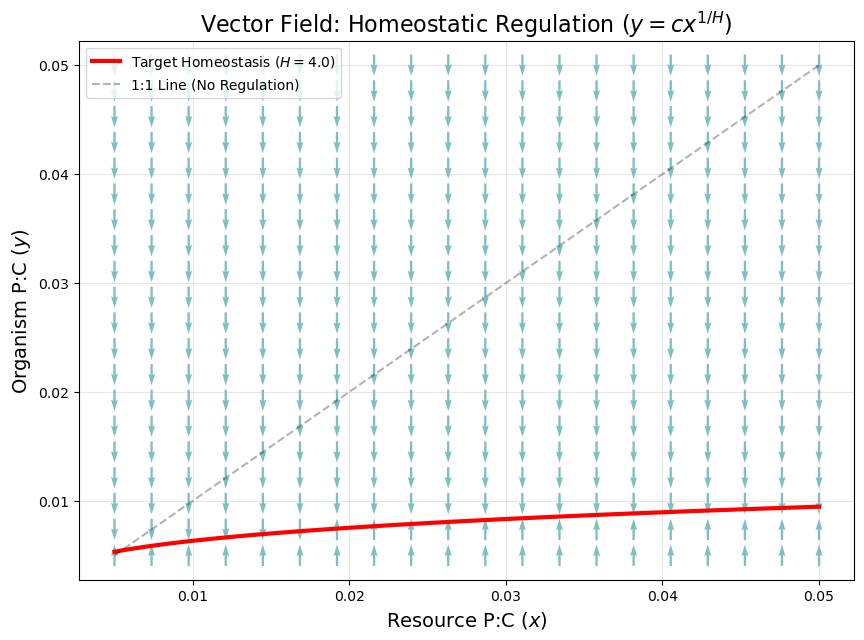

In [8]:
c_val = 0.02
H_val = 4.0      # Weak Homeostasis (e.g., Zooplankton)

x_range = np.linspace(0.005, 0.05, 20)  # Environmental P:C
y_range = np.linspace(0.005, 0.05, 20)  # Internal P:C
X, Y = np.meshgrid(x_range, y_range)

Y_target = homeostasis_model(X, c_val, H_val)

dY = Y_target - Y  
dX = np.zeros_like(X) # X (Environment) is independent of the organism's regulation here

Norm = np.sqrt(dX**2 + dY**2)
dY_norm = dY / (Norm + 1e-9)
dX_norm = dX / (Norm + 1e-9)

fig, ax = plt.subplots(figsize=(10, 7))

ax.quiver(X, Y, dX_norm, dY_norm, color='teal', alpha=0.5, pivot='mid')

x_line = np.linspace(0.005, 0.05, 100)
y_line = homeostasis_model(x_line, c_val, H_val)
ax.plot(x_line, y_line, 'r-', linewidth=3, label=f'Target Homeostasis ($H={H_val}$)')

ax.plot(x_line, x_line, 'k--', alpha=0.3, label='1:1 Line (No Regulation)')

ax.set_title(f'Vector Field: Homeostatic Regulation ($y = c x^{{1/H}}$)', fontsize=16)
ax.set_xlabel('Resource P:C ($x$)', fontsize=14)
ax.set_ylabel('Organism P:C ($y$)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()